In [ ]:
import os
import csv
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import cv2 as cv

#Plot
import matplotlib.pyplot as plt
import seaborn as sns

#data
from collections import Counter

#import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Add, Average
from tensorflow.keras.layers import GlobalAveragePooling2D,Convolution2D,ReLU
from tensorflow.keras import optimizers

#callback
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard

#model
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.models import Model, load_model

import zipfile

In [ ]:
!gdown --id 1hDxkAGFpMfHLyskPy99JAGODsyAz50c7
zip_ref = zipfile.ZipFile('/content/archive.zip', 'r') #Opens the zip file in
zip_ref.extractall('/content/') #Extracts the files into the /content folder
zip_ref.close()

Downloading...
From: https://drive.google.com/uc?id=1hDxkAGFpMfHLyskPy99JAGODsyAz50c7
To: /content/archive.zip
100% 1.28G/1.28G [00:06<00:00, 202MB/s]


In [ ]:
df = pd.read_csv("/content/archive/Chest_xray_Corona_Metadata.csv")
print('資料的形式:{}'.format(df.shape))
print('遺漏的數量:{}'.format(df.isnull().sum().sum()))
df.head() #read excel data from pandas

資料的形式:(5910, 6)
遺漏的數量:7417


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [ ]:
label = df[['X_ray_image_name','Label','Dataset_type']]
print(label)
train_label = label[label['Dataset_type']=='TRAIN']
print(train_label)
test_label = label[label['Dataset_type']=='TEST']
print(test_label)

                X_ray_image_name     Label Dataset_type
0              IM-0128-0001.jpeg    Normal        TRAIN
1              IM-0127-0001.jpeg    Normal        TRAIN
2              IM-0125-0001.jpeg    Normal        TRAIN
3              IM-0122-0001.jpeg    Normal        TRAIN
4              IM-0119-0001.jpeg    Normal        TRAIN
...                          ...       ...          ...
5905  person1637_virus_2834.jpeg  Pnemonia         TEST
5906  person1635_virus_2831.jpeg  Pnemonia         TEST
5907  person1634_virus_2830.jpeg  Pnemonia         TEST
5908  person1633_virus_2829.jpeg  Pnemonia         TEST
5909  person1632_virus_2827.jpeg  Pnemonia         TEST

[5910 rows x 3 columns]
                               X_ray_image_name     Label Dataset_type
0                             IM-0128-0001.jpeg    Normal        TRAIN
1                             IM-0127-0001.jpeg    Normal        TRAIN
2                             IM-0125-0001.jpeg    Normal        TRAIN
3                  

In [ ]:
original_dataset_dir = '/content'
train_dir = os.path.join(original_dataset_dir,'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

test_dir = os.path.join(original_dataset_dir,'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

    
Ptrain_dir = os.path.join(train_dir,'Pnemonia')
if not os.path.exists(Ptrain_dir):
    os.mkdir(Ptrain_dir)

Ptest_dir = os.path.join(test_dir,'Pnemonia')
if not os.path.exists(Ptest_dir):
    os.mkdir(Ptest_dir)
    
Ntrain_dir = os.path.join(train_dir,'Normal')
if not os.path.exists(Ntrain_dir):
    os.mkdir(Ntrain_dir)

Ntest_dir = os.path.join(test_dir,'Normal')
if not os.path.exists(Ntest_dir):
    os.mkdir(Ntest_dir)

In [ ]:
train_pcount = train_label[train_label['Label']=='Pnemonia'].shape[0]
train_ncount = train_label[train_label['Label']=='Normal'].shape[0]
train_pnemonia = train_label[train_label['Label']=='Pnemonia']
train_normal = train_label[train_label['Label']=='Normal']

test_pcount = test_label[test_label['Label']=='Pnemonia'].shape[0]
test_ncount = test_label[test_label['Label']=='Normal'].shape[0]
test_pnemonia = test_label[test_label['Label']=='Pnemonia']
test_normal = test_label[test_label['Label']=='Normal']

In [ ]:
import os,shutil
fnames = [train_pnemonia.iloc[i,0] for i in range(train_pcount)]
print(fnames)
for fname in fnames:
    src = os.path.join('/content/archive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train', fname)
    dst = os.path.join(Ptrain_dir,fname)
    shutil.copyfile(src, dst)

fnames = [train_normal.iloc[i,0] for i in range(train_ncount)]
print(fnames)
for fname in fnames:
    src = os.path.join('/content/archive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train', fname)
    dst = os.path.join(Ntrain_dir,fname)
    shutil.copyfile(src, dst)

#------#
fnames = [test_pnemonia.iloc[i,0] for i in range(test_pcount)]
print(fnames)
for fname in fnames:
    src = os.path.join('/content/archive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test', fname)
    dst = os.path.join(Ptest_dir,fname)
    shutil.copyfile(src, dst)

fnames = [test_normal.iloc[i,0] for i in range(test_ncount)]
print(fnames)
for fname in fnames:
    src = os.path.join('/content/archive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test', fname)
    dst = os.path.join(Ntest_dir,fname)
    shutil.copyfile(src, dst)
    

['person101_virus_188.jpeg', 'person101_virus_187.jpeg', 'person1019_virus_1708.jpeg', 'person1019_virus_1707.jpeg', 'person1019_bacteria_2950.jpeg', 'person1018_virus_1706.jpeg', 'person1018_bacteria_2949.jpeg', 'person1017_bacteria_2948.jpeg', 'person1016_virus_1704.jpeg', 'person1016_bacteria_2947.jpeg', 'person1015_virus_1702.jpeg', 'person1015_virus_1701.jpeg', 'person1014_bacteria_2945.jpeg', 'person1012_bacteria_2943.jpeg', 'person1011_bacteria_2942.jpeg', 'person1010_virus_1695.jpeg', 'person1010_bacteria_2941.jpeg', 'person100_virus_184.jpeg', 'person1009_virus_1694.jpeg', 'person1008_virus_1691.jpeg', 'person1008_bacteria_2939.jpeg', 'person1007_virus_1690.jpeg', 'person1007_bacteria_2938.jpeg', 'person1006_bacteria_2937.jpeg', 'person1005_virus_1688.jpeg', 'person1005_bacteria_2936.jpeg', 'person1004_virus_1686.jpeg', 'person1004_bacteria_2935.jpeg', 'person1003_virus_1685.jpeg', 'person1003_bacteria_2934.jpeg', 'person1002_bacteria_2933.jpeg', 'person1001_bacteria_2932.jpeg

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
     train_dir,
     target_size=(224, 224),
     batch_size=1,
     class_mode='binary')

Found 5286 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False,
input_shape=(224, 224, 3))
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 50

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
import numpy as np
def extract_features(directory, sample_count):
 features = np.zeros(shape=(sample_count, 7, 7, 512)) 
 labels = np.zeros(shape=(sample_count))
 generator = datagen.flow_from_directory(
 directory, 
 target_size=(224, 224), 
 batch_size=batch_size, 
 class_mode='binary')
 i = 0
 for inputs_batch, labels_batch in generator:
     features_batch = conv_base.predict(inputs_batch)
     features[i * batch_size : (i + 1) * batch_size] = features_batch 
     labels[i * batch_size : (i + 1) * batch_size] = labels_batch
     i += 1
     if i * batch_size >= sample_count:
         break 
 return features, labels
train_features, train_labels = extract_features(train_dir, 5286) 
test_features, test_labels = extract_features(test_dir, 624)

Found 5286 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
train_features = np.reshape(train_features, (5286, 7 * 7 * 512))
test_features = np.reshape(test_features, (624, 7 * 7 * 512))

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
 loss='mean_squared_logarithmic_error',
 metrics=['acc'])

history = model.fit(train_features, train_labels,
 epochs=20,
 batch_size=80,
 validation_data=(train_features, train_labels)
 )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
67/67 [==============================] - 3s 33ms/step - loss: 0.1057 - acc: 0.7773 - val_loss: 0.0246 - val_acc: 0.9257
Epoch 2/20
67/67 [==============================] - 1s 22ms/step - loss: 0.0447 - acc: 0.8990 - val_loss: 0.0188 - val_acc: 0.9733
Epoch 3/20
67/67 [==============================] - 1s 21ms/step - loss: 0.0241 - acc: 0.9455 - val_loss: 0.0125 - val_acc: 0.9747
Epoch 4/20
67/67 [==============================] - 1s 21ms/step - loss: 0.0192 - acc: 0.9620 - val_loss: 0.0127 - val_acc: 0.9701
Epoch 5/20
67/67 [==============================] - 1s 21ms/step - loss: 0.0166 - acc: 0.9656 - val_loss: 0.0138 - val_acc: 0.9824
Epoch 6/20
67/67 [==============================] - 1s 20ms/step - loss: 0.0135 - acc: 0.9758 - val_loss: 0.0070 - val_acc: 0.9869
Epoch 7/20
67/67 [==============================] - 2s 23ms/step - loss: 0.0133 - acc: 0.9762 - val_loss: 0.0060 - val_acc: 0.9915
Epoch 8/20
67/67 [==============================] - 1s 20ms/step - loss: 0.0115 - a

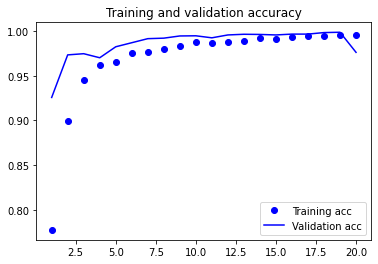

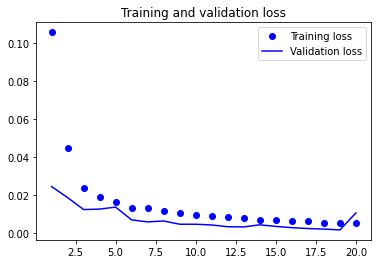

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_features, test_labels)

20/20 [==============================] - 0s 5ms/step - loss: 0.0395 - acc: 0.8990


[0.039468687027692795, 0.8990384340286255]